## 3.1机器学习
### 1机器学习简史
机器学习的发展如图，其中发展到现在机器学习分成了两大阵营，一个是以神经网络为核心主张联结主义，一个以支持向量机为核心主张符号逻辑方法：
<img alt="发展历史" height="800" src="3-2.png" width="1600"/>

### 2机器学习模型
机器学习本质是让机器像人一样去发现世界的本质和规律，不过机器的认知过程是来自与数据集合，而人的认知过程是来自于对于客观世界的观察。

## 3.2线性回归
### 1线性模型
使用线性回归(Linear Regression)开始入门，假设我们具有样本数据集如下：
<img alt="发展历史" height="800" src="t3-1.png" width="1600"/>


In [1]:
import torch
import matplotlib.pyplot as plt

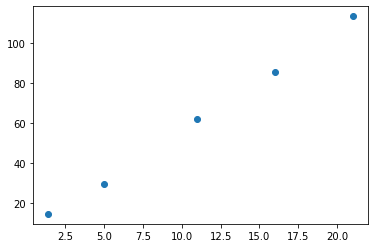

In [2]:
x = torch.Tensor([1.4, 5, 11, 16, 21])
y = torch.Tensor([14.4, 29.6, 62, 85.5, 113.4])

plt.scatter(x.numpy(), y.numpy())
plt.show()

### 2目标函数
我们的目标是寻找一个线性函数来拟合这个散点图：
$$
\hat y=w_1x+w_0
$$
<img alt="参数表" height="800" src="t3-2.jpeg" width="1600"/>

为了避免对参数的调整使得预测结果出现离散的变化，同时考虑面临的是回归问题，这里使用均方误差，激活函数是恒等函数，所以不需要特殊说明了。均方误差的公式如下
$$
L(w_1,w_2)=\sum_{i=1}^5({\hat y}^{(i)}-y^{(i)})^2=\sum_{i=1}^5(w_1x^{(i)}+w_0-y^{(i)})^2
$$

### 3优化
为了让预测值和真实值差距变小，就是让损失函数的值变小，我们需要不断调整$w$参数的值,这个过程称为优化，这里先使用最简单的梯度下降他的工作原理就是在损失函数上的一点寻找梯度下降最大的方向，然后进行梯度更新：
<img alt="梯度下降" height="800" src="3-5.jpeg" width="1600"/>

$$
w_1^{t+1}=w_1^t-{\partial L\over \partial w_1^t }\delta\\
w_0^{t+1}=w_0^t-{\partial L\over \partial w_0^t }\delta
$$

其中$\delta$称为学习率，最后我们来更新向量
$$
\vec w_1^{t+1}=\vec w^t - \nabla L(\vec w^t)\delta
$$

### 4批学习
我们可以把前面说的目标函数的形式写成向量的形式，这样我们就可以应用批量学习了：
$$
\vec \hat y =X \vec w
$$

### 5训练(学习)
学习过程如下，流程图附后：
1、先计算一个预测结果
2、通过损失函数计算损失
3、反向传播求梯度后更新参数
4、回到1过程，直到完成迭代指定次数。
<img alt="流程图" height="800" src="3-8.jpeg" width="1600"/>

### 6代码实践

In [3]:
def Produce_X(x):
    x0 = torch.ones(x.numpy().size)
    print(x0)
    X = torch.stack((x, x0), dim=1)
    print(X)
    return X

In [4]:
x = torch.Tensor([1.4, 5, 11, 16, 21])
y = torch.Tensor([14.4, 29.6, 62, 85.5, 113.4])
X = Produce_X(x)

tensor([1., 1., 1., 1., 1.])
tensor([[ 1.4000,  1.0000],
        [ 5.0000,  1.0000],
        [11.0000,  1.0000],
        [16.0000,  1.0000],
        [21.0000,  1.0000]])


In [5]:
input = X
target = y
w = torch.rand(2, requires_grad=True)

In [6]:
print(w)

tensor([0.3585, 0.1734], requires_grad=True)


In [7]:
def draw(output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'loss=%s' % (loss.item()), fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)

In [8]:
def train(epochs=1, learning_rate=0.01):

    for epoch in range(epochs):
        output = input.mv(w)  #前向传播
        loss = (output - target).pow(2).sum()  #求损失

        loss.backward()  #反向传播
        w.data -= learning_rate * w.grad  #更新梯度
        w.grad.zero_()
        if epoch % 80 == 0:
            draw(output, loss)

    return w, loss

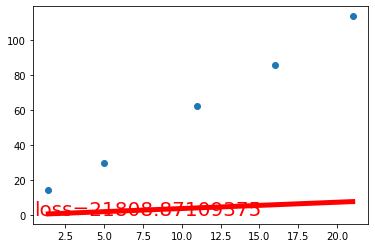

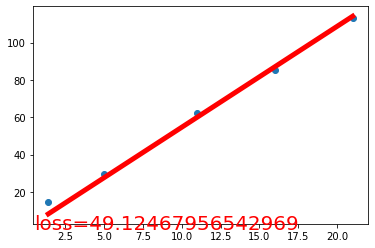

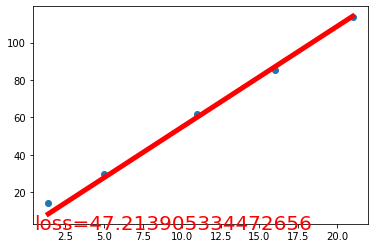

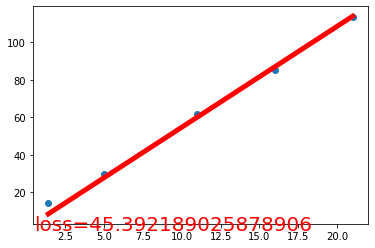

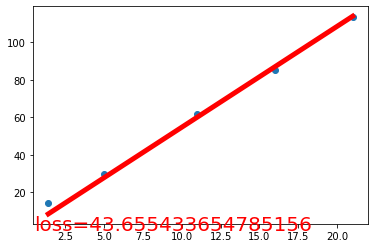

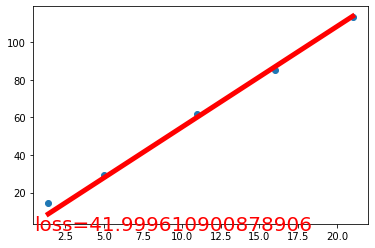

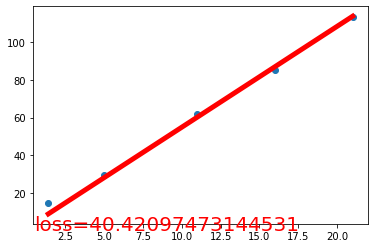

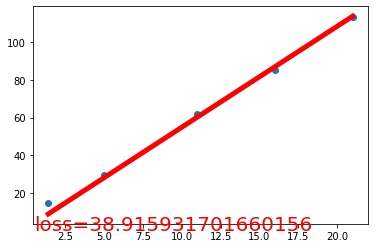

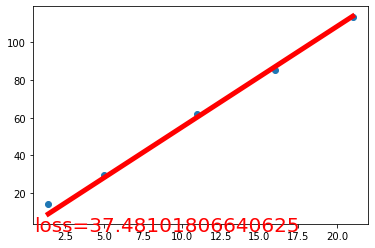

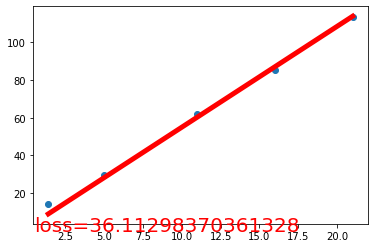

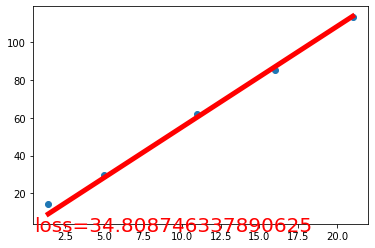

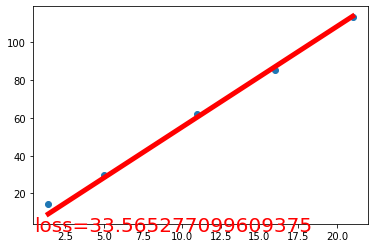

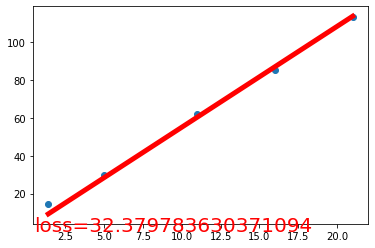

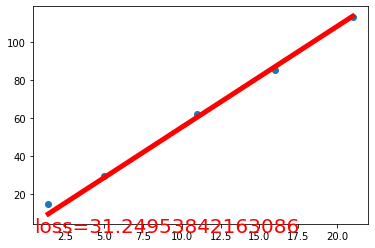

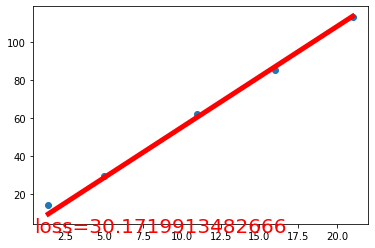

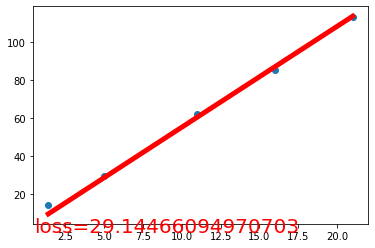

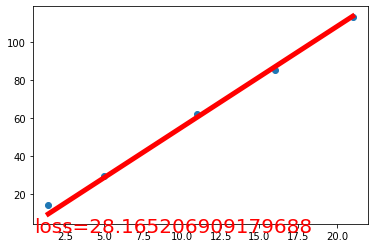

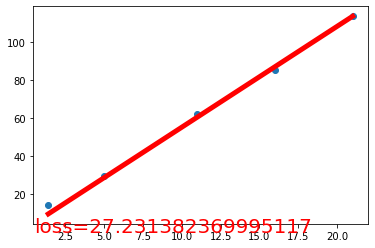

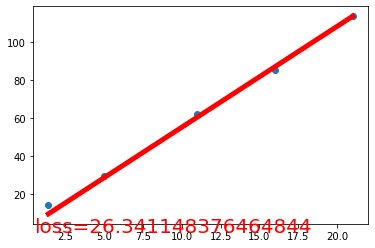

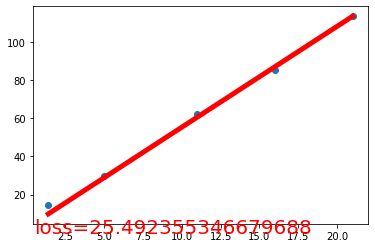

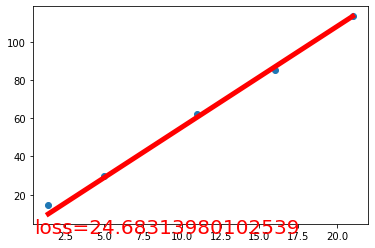

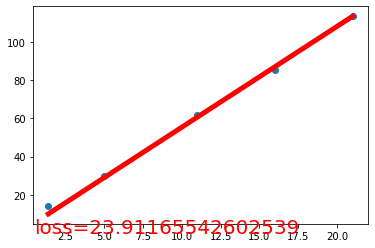

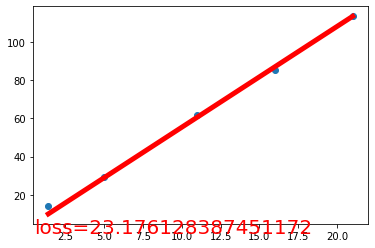

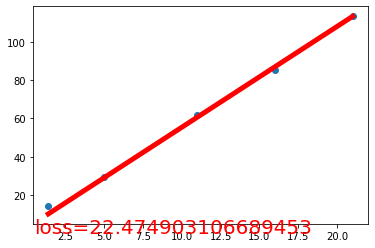

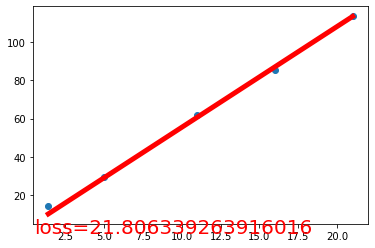

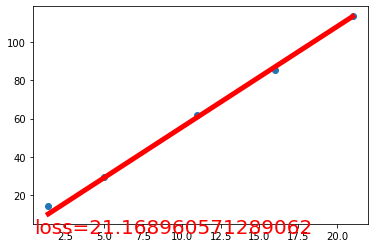

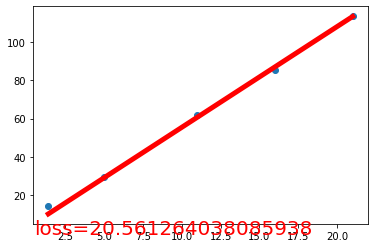

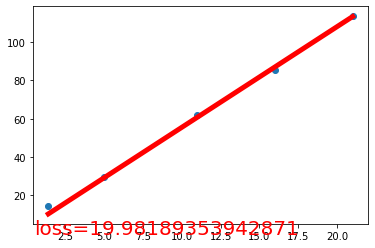

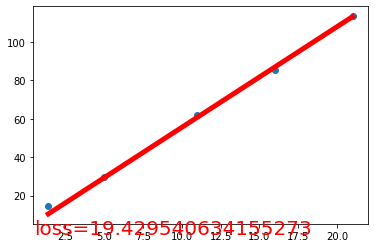

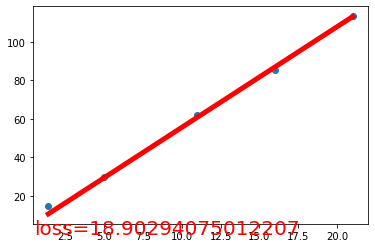

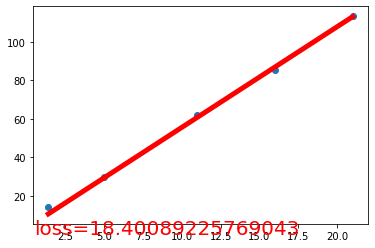

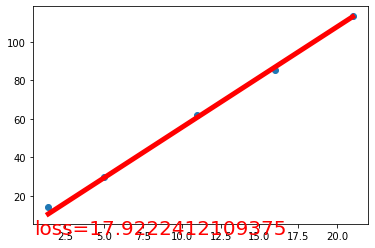

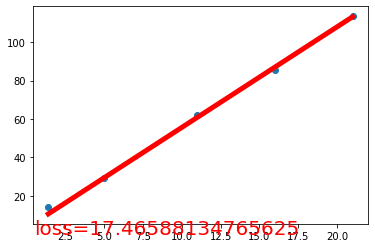

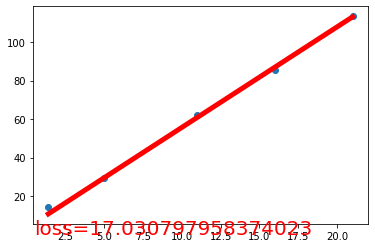

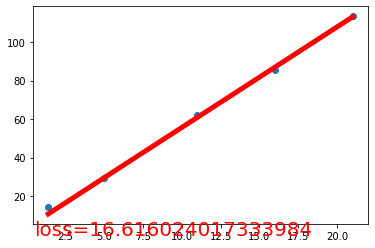

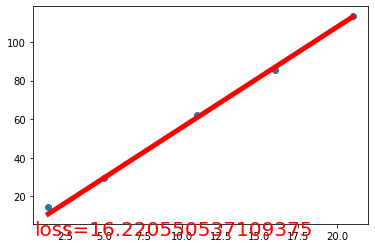

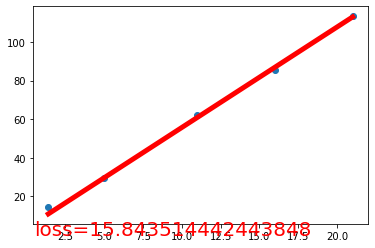

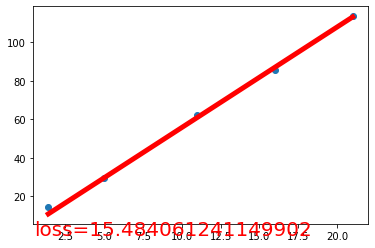

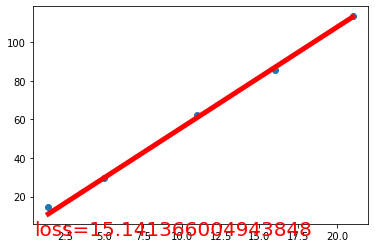

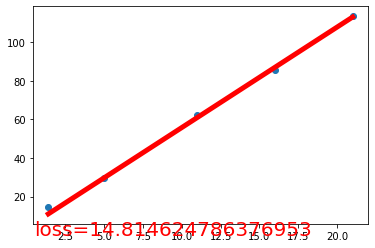

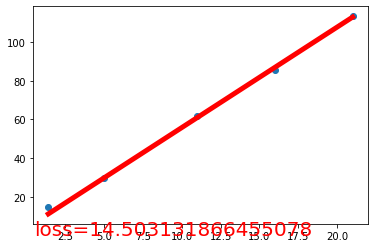

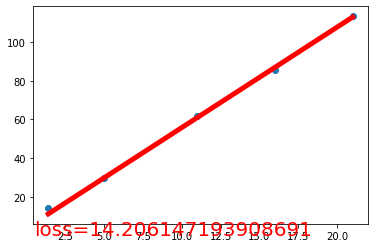

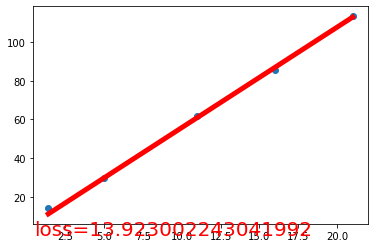

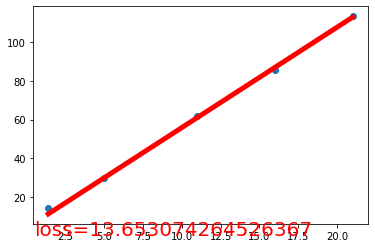

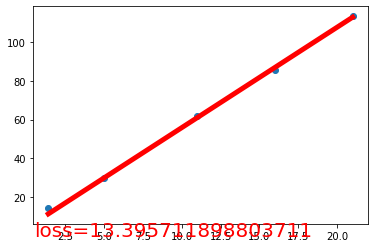

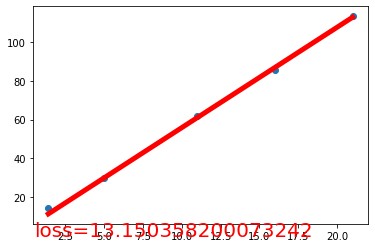

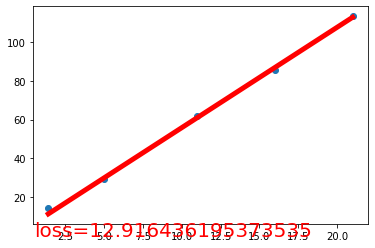

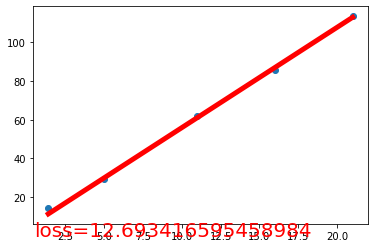

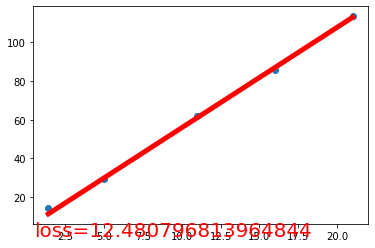

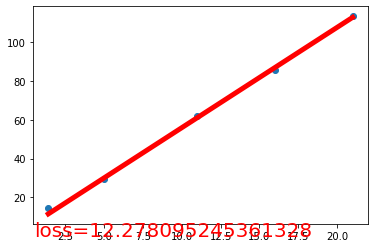

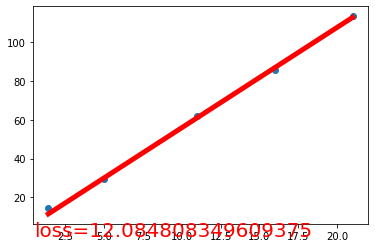

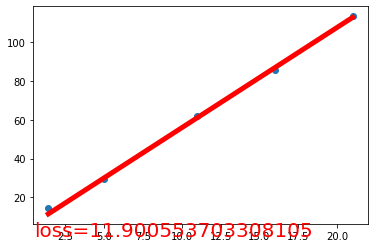

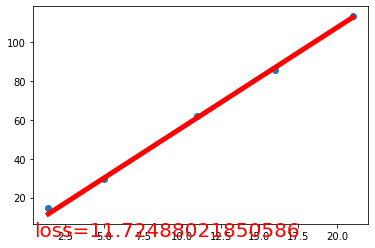

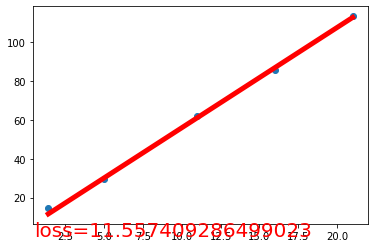

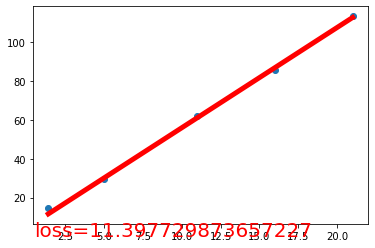

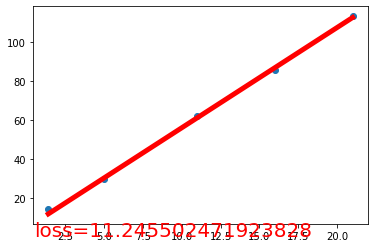

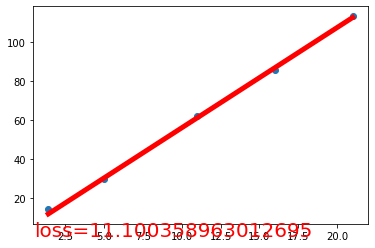

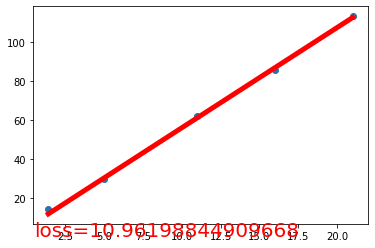

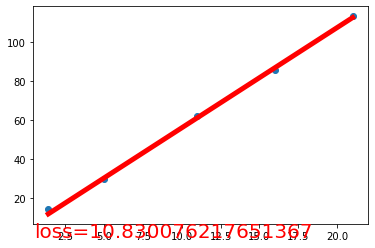

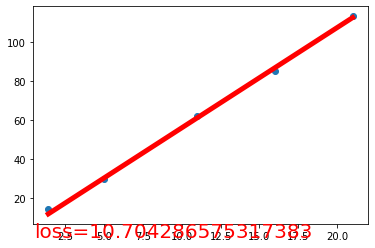

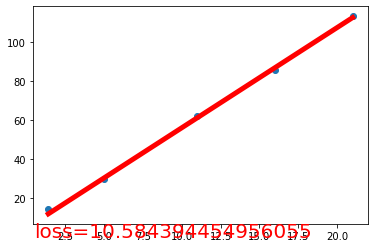

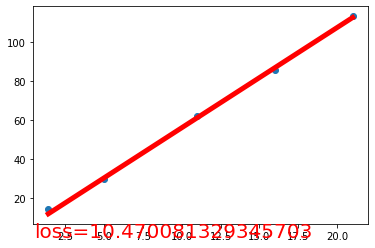

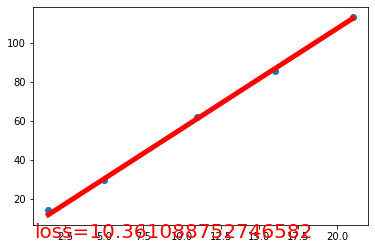

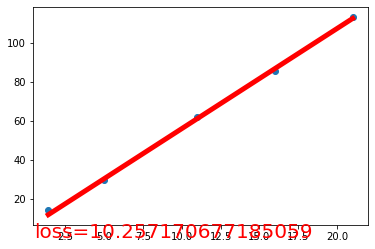

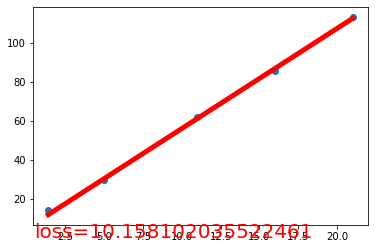

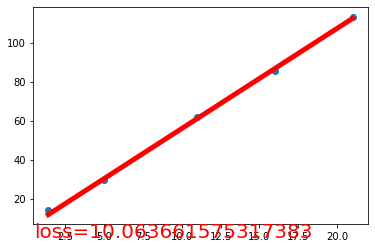

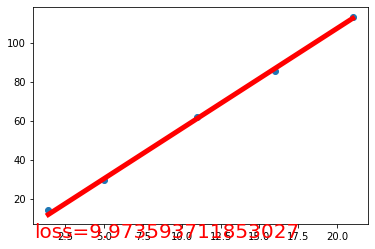

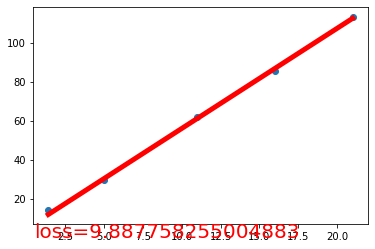

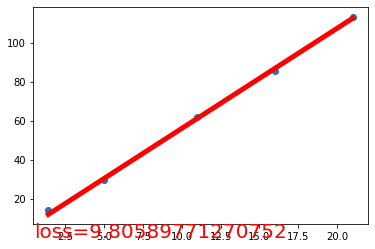

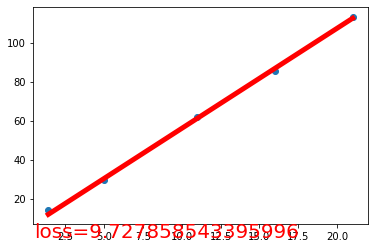

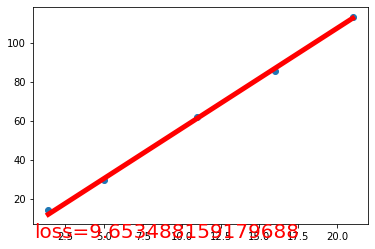

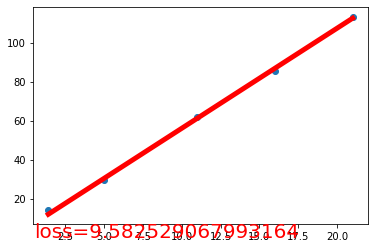

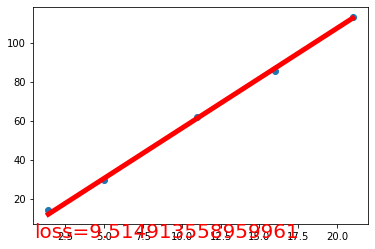

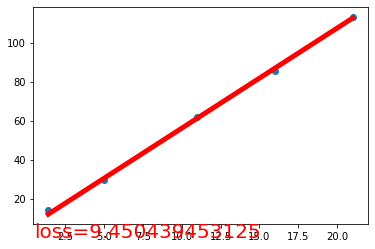

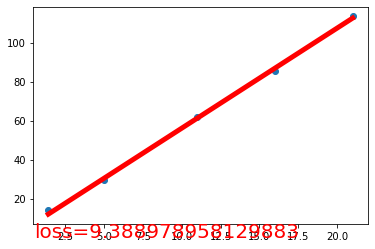

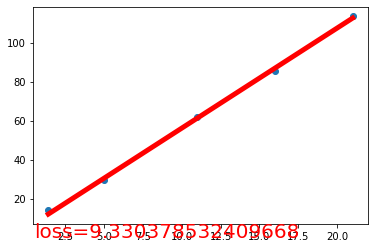

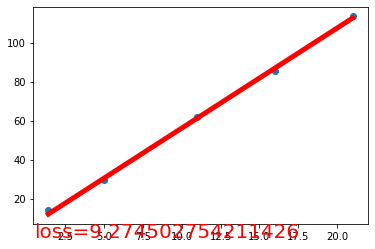

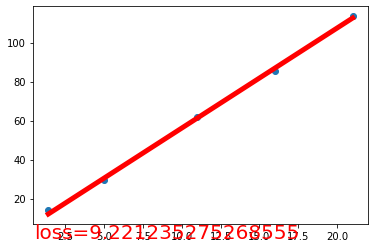

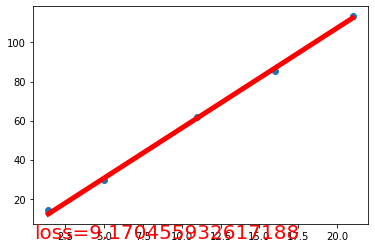

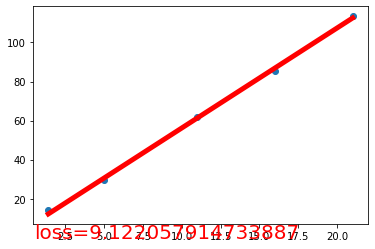

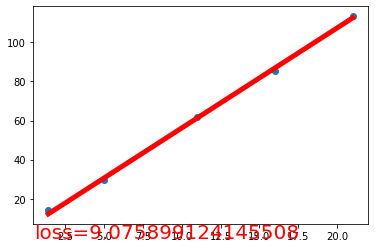

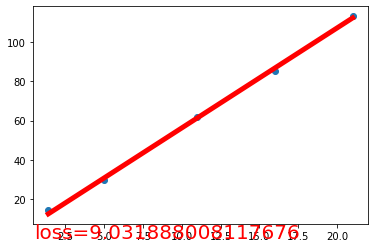

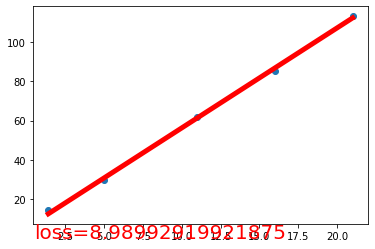

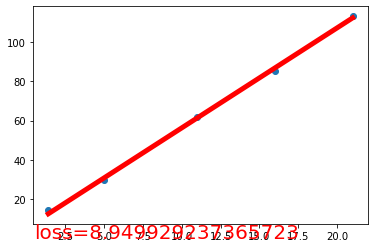

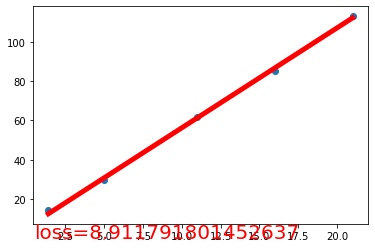

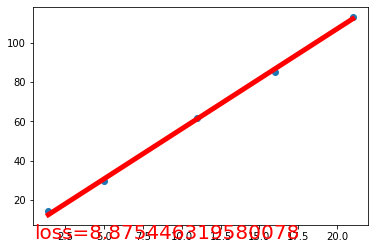

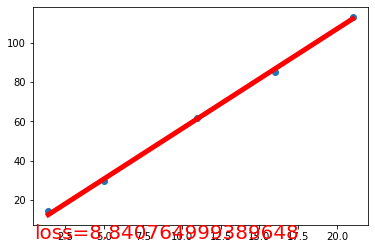

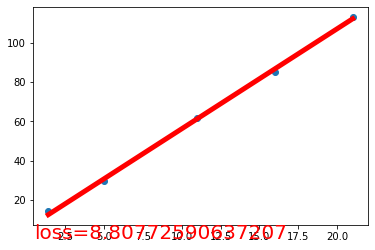

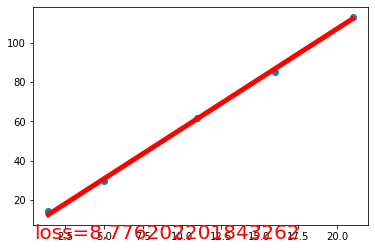

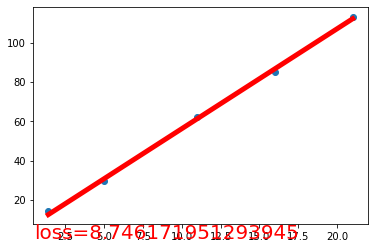

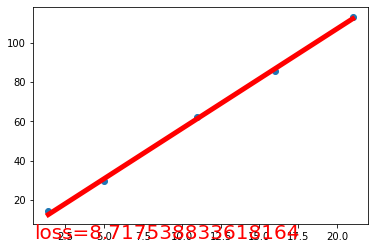

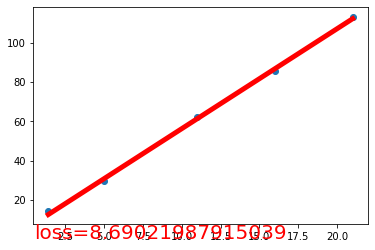

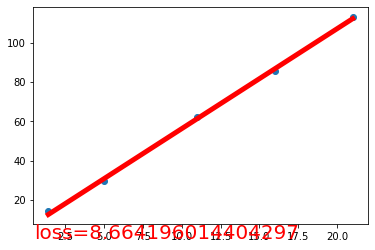

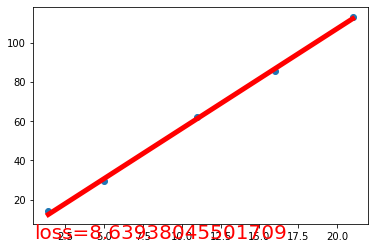

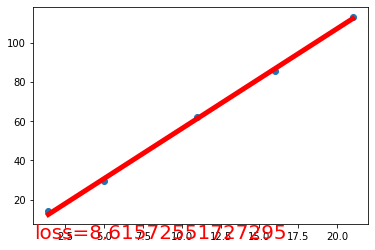

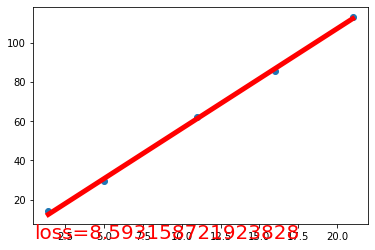

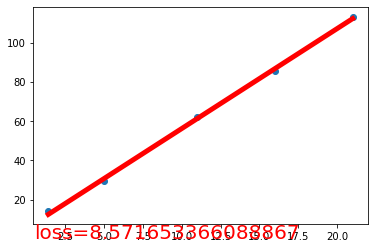

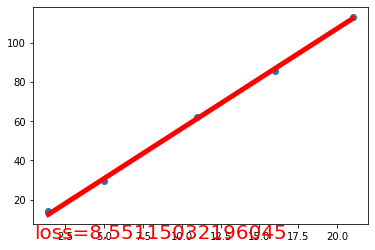

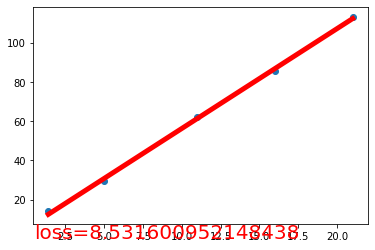

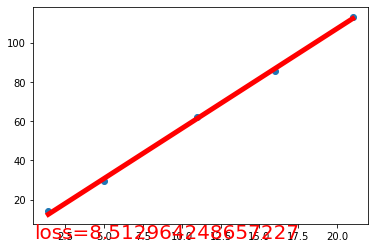

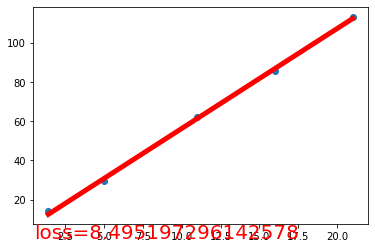

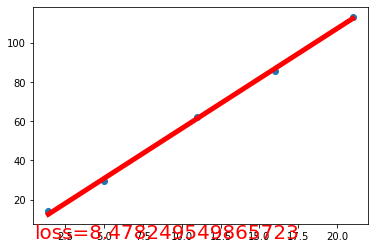

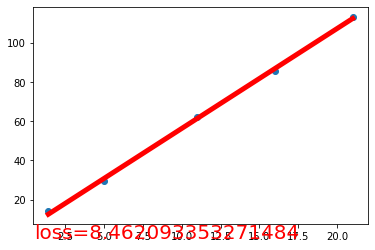

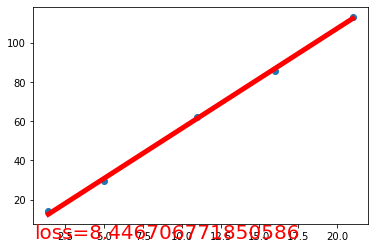

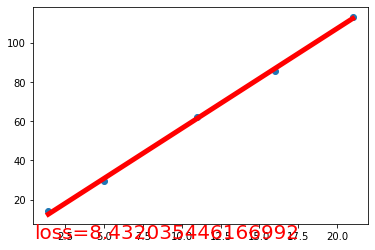

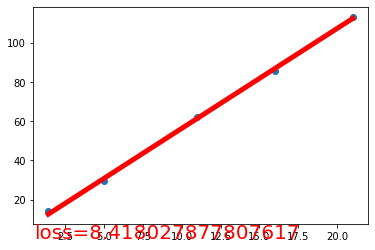

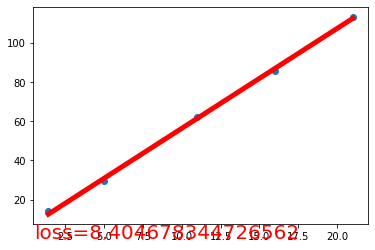

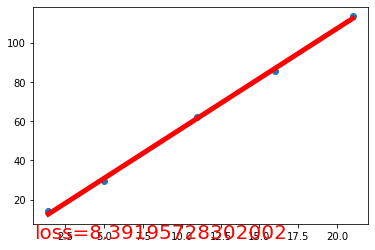

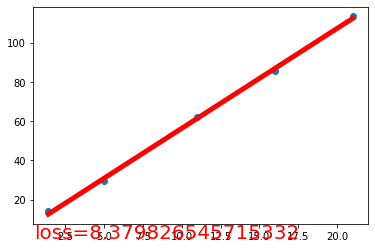

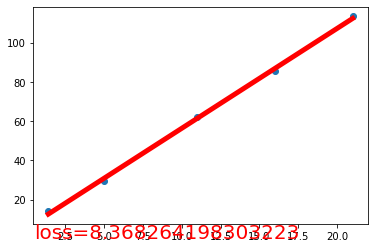

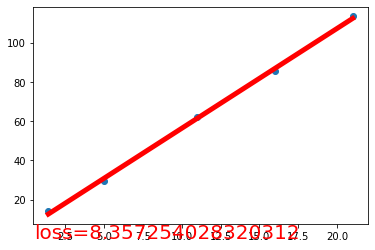

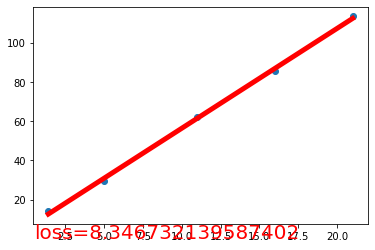

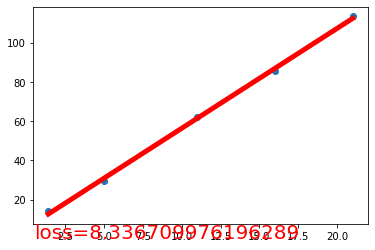

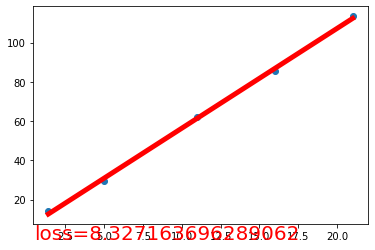

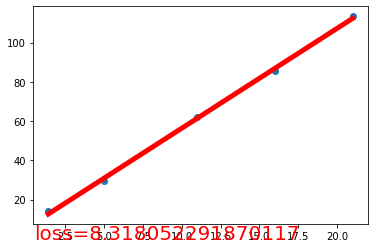

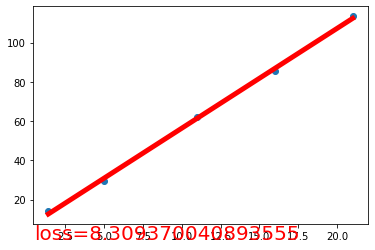

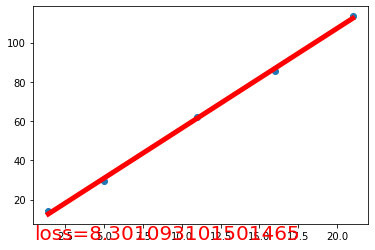

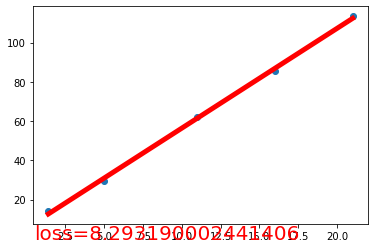

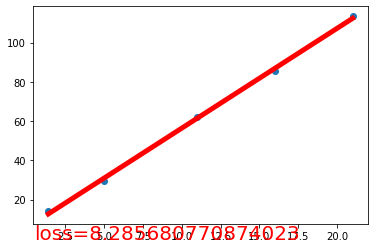

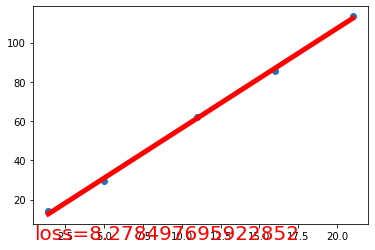

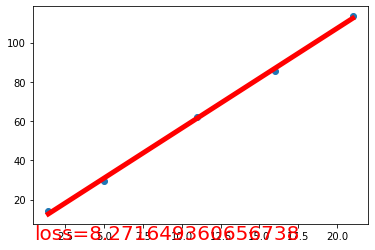

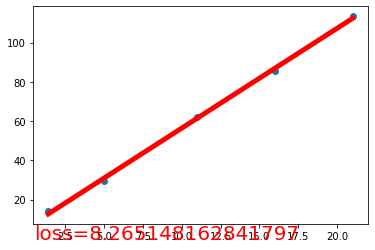

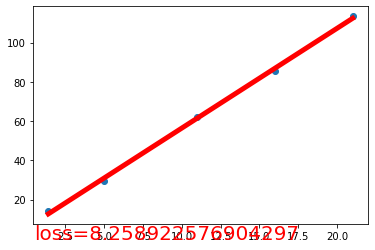

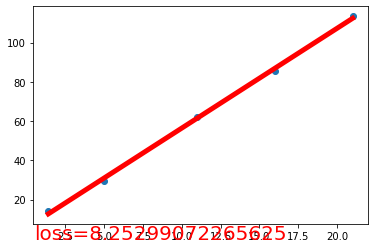

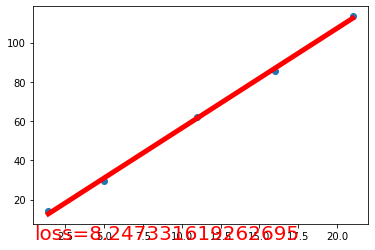

In [9]:
w, loss =train(10000,learning_rate=1e-4)

In [10]:
print("final loss:",loss.item())
print("weights:",w.data)

final loss: 8.242020606994629
weights: tensor([5.0839, 5.5862])
